In [1]:
import numpy as np

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs


In [3]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
X

array([[ 1.93588481, -0.88149148],
       [ 1.71969865,  0.46374962],
       [ 1.15198658,  1.10011066],
       ...,
       [ 0.29633685, -0.5329771 ],
       [-0.04031119, -1.42811628],
       [ 0.66731858, -1.4449036 ]])

In [5]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

[0 1 1 ... 0 2 0]
number of estimated clusters : 3


[ True False False ...  True False  True]
[-0.88149148 -1.54500763 -0.9526129  ... -1.60251829 -0.5329771
 -1.4449036 ]
[False  True  True ... False False False]
[0.46374962 1.10011066 1.34710079 ... 1.45536355 1.86822303 0.70475418]
[False False False ... False  True False]
[-0.89890279 -1.58832953 -0.65756553 ... -0.81909222 -0.7185421
 -1.42811628]


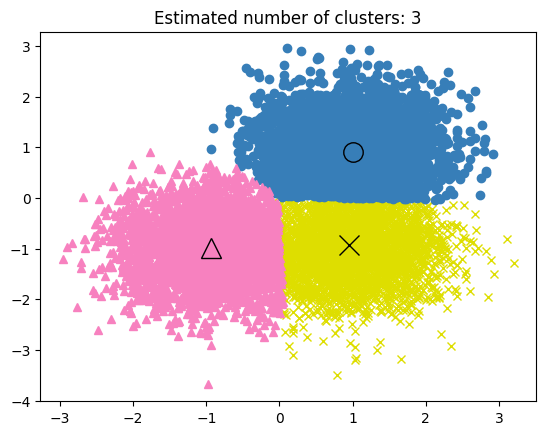

In [10]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()